In [6]:
import numpy as np
print(np.random.rand(5,2))

[[0.97203792 0.79672616]
 [0.46114555 0.294947  ]
 [0.51491323 0.18517619]
 [0.03385028 0.29776273]
 [0.41713313 0.8581908 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy (Credit.csv): 0.9583333333333334
Logistic Regression Accuracy (Credit-Modified.csv): 0.9333333333333333
SVM Accuracy (Credit.csv): 0.9916666666666667
SVM Accuracy (Credit-Modified.csv): 0.9916666666666667


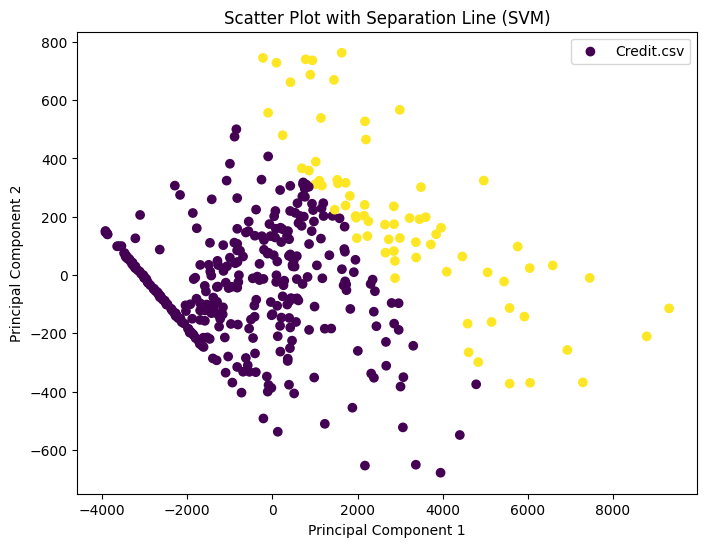

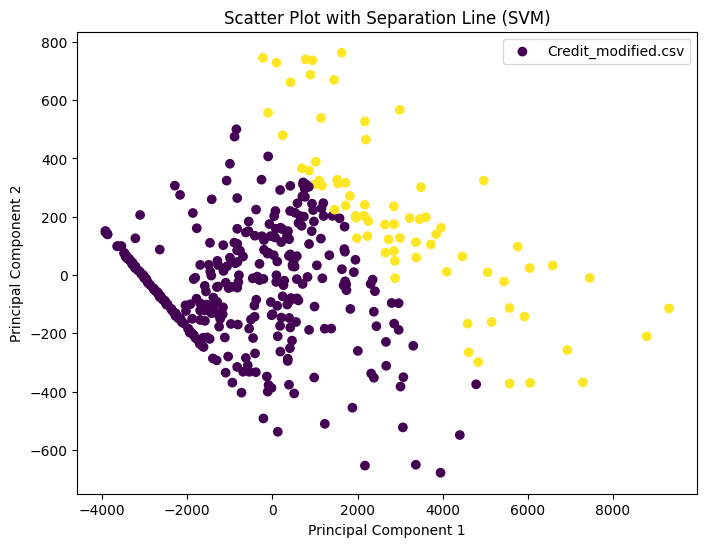

Anova Test Results for Credit.csv
       Feature     F-Score       P-Value
0   Unnamed: 0    0.035254  8.511595e-01
1       Income   78.609099  2.571368e-17
2        Limit  252.248530  2.396566e-44
3       Rating  259.693257  2.465673e-45
4        Cards    4.025334  4.549784e-02
5          Age    0.579367  4.470113e-01
6    Education    0.036607  8.483654e-01
7       Gender    0.004563  9.461796e-01
8      Student   33.242414  1.633990e-08
9      Married    0.313386  5.759248e-01
10   Ethnicity    0.024695  8.752103e-01
11     Balance  494.736145  8.163230e-72

Anova Test Results for Credit-Modified.csv
        Feature     F-Score       P-Value
0    Unnamed: 0    0.035254  8.511595e-01
1        Income   78.609099  2.571368e-17
2         Limit  252.248530  2.396566e-44
3        Rating  259.693257  2.465673e-45
4         Cards    4.025334  4.549784e-02
5           Age    0.579367  4.470113e-01
6     Education    0.036607  8.483654e-01
7    Gender-num    0.004563  9.461796e-01
8        Ge

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the datasets
credit_data = pd.read_csv('/content/Credit.csv')
modified_credit_data = pd.read_csv('/content/Credit-Modified.csv')


# Handle categorical variables if any
categorical_columns1 = ['Gender', 'Student', 'Married', 'Ethnicity']
for col in categorical_columns1:
    label_encoder = LabelEncoder()
    credit_data[col] = label_encoder.fit_transform(credit_data[col])
    # modified_credit_data[col] = label_encoder.fit_transform(modified_credit_data[col])


categorical_columns2 = [ 'Married', 'Ethnicity']
for col in categorical_columns2:
    label_encoder = LabelEncoder()
    # credit_data[col] = label_encoder.fit_transform(credit_data[col])
    modified_credit_data[col] = label_encoder.fit_transform(modified_credit_data[col])

# Explore the data (e.g., check columns, data types, etc.)
# print(credit_data.head())
# print(modified_credit_data.head())

columns_to_drop = ['Unnamed: 0']
cleaned_credit_data = credit_data.drop(columns=columns_to_drop)
cleaned_modified_credit_data = modified_credit_data.drop(columns=columns_to_drop)

# print(credit_data.head())
# print(modified_credit_data.head())



from sklearn.model_selection import train_test_split

# Prepare features and target variable
# Assuming 'default' is the target variable
X_credit = credit_data.drop(columns=['Defaultee'])
y_credit = credit_data['Defaultee']

X_modified_credit = modified_credit_data.drop(columns=['Defaultee','dcat','Gender', 'Student'])
y_modified_credit = modified_credit_data['Defaultee']

# Split the datasets into training and testing sets (70-30 split)
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.3, random_state=42)
X_modified_credit_train, X_modified_credit_test, y_modified_credit_train, y_modified_credit_test = train_test_split(X_modified_credit, y_modified_credit, test_size=0.3, random_state=42)




from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Logistic Regression models
logistic_model_credit = LogisticRegression()
logistic_model_credit.fit(X_credit_train, y_credit_train)

logistic_model_modified_credit = LogisticRegression()
logistic_model_modified_credit.fit(X_modified_credit_train, y_modified_credit_train)

# Train SVM models
svm_model_credit = SVC(kernel='linear')
svm_model_credit.fit(X_credit_train, y_credit_train)

svm_model_modified_credit = SVC(kernel='linear')
svm_model_modified_credit.fit(X_modified_credit_train, y_modified_credit_train)

# Predict on the testing data
logistic_pred_credit = logistic_model_credit.predict(X_credit_test)
logistic_pred_modified_credit = logistic_model_modified_credit.predict(X_modified_credit_test)

svm_pred_credit = svm_model_credit.predict(X_credit_test)
svm_pred_modified_credit = svm_model_modified_credit.predict(X_modified_credit_test)

# Assess model performance (e.g., accuracy)
logistic_accuracy_credit = accuracy_score(y_credit_test, logistic_pred_credit)
logistic_accuracy_modified_credit = accuracy_score(y_modified_credit_test, logistic_pred_modified_credit)

svm_accuracy_credit = accuracy_score(y_credit_test, svm_pred_credit)
svm_accuracy_modified_credit = accuracy_score(y_modified_credit_test, svm_pred_modified_credit)

print(f"Logistic Regression Accuracy (Credit.csv): {logistic_accuracy_credit}")
print(f"Logistic Regression Accuracy (Credit-Modified.csv): {logistic_accuracy_modified_credit}")
print(f"SVM Accuracy (Credit.csv): {svm_accuracy_credit}")
print(f"SVM Accuracy (Credit-Modified.csv): {svm_accuracy_modified_credit}")




# Visualization with a separation line (for SVM - using only two features)
# Assuming X_credit and X_modified_credit have multiple features, here reducing to 2 for visualization
# Perform PCA or t-SNE to reduce dimensions for plotting

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_credit_pca = pca.fit_transform(X_credit)
X_modified_credit_pca = pca.fit_transform(X_modified_credit)

# Scatter plot with separation line for SVM (example using PCA data)
plt.figure(figsize=(8, 6))
plt.scatter(X_credit_pca[:, 0], X_credit_pca[:, 1], c=y_credit, cmap='viridis', label='Credit.csv')

# Plot SVM separation line (if applicable)
# Similarly for modified_credit_data
plt.figure(figsize=(8, 6))
plt.scatter(X_modified_credit_pca[:, 0], X_modified_credit_pca[:, 1], c=y_credit, cmap='viridis', label='Credit_modified.csv')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with Separation Line (SVM)')
plt.legend()
plt.show()




from sklearn.feature_selection import f_classif

# Assuming X_credit and X_modified_credit are your feature matrices

# Perform Anova test for feature significance
f_score_credit, p_value_credit = f_classif(X_credit, y_credit)
f_score_modified_credit, p_value_modified_credit = f_classif(X_modified_credit, y_modified_credit)

# Display feature importance (higher F-score indicates more significance)
feature_importance_credit = pd.DataFrame({'Feature': X_credit.columns, 'F-Score': f_score_credit, 'P-Value': p_value_credit})
feature_importance_modified_credit = pd.DataFrame({'Feature': X_modified_credit.columns, 'F-Score': f_score_modified_credit, 'P-Value': p_value_modified_credit})

print("Anova Test Results for Credit.csv")
print(feature_importance_credit)

print("\nAnova Test Results for Credit-Modified.csv")
print(feature_importance_modified_credit)



# For logistic regression coefficients' significance (example)
from scipy.stats import ttest_ind

# Assuming logistic_model_credit and logistic_model_modified_credit are the trained models
logistic_coefs_credit = logistic_model_credit.coef_
logistic_coefs_modified_credit = logistic_model_modified_credit.coef_

# Perform t-test to test significance of coefficients
t_statistic_credit, p_value_coef_credit = ttest_ind(logistic_coefs_credit, [0]*logistic_coefs_credit.shape[1])
t_statistic_modified_credit, p_value_coef_modified_credit = ttest_ind(logistic_coefs_modified_credit, [0]*logistic_coefs_modified_credit.shape[1])

print("Significance Test for Logistic Regression Coefficients (Credit.csv)")
print(f"T-statistic: {t_statistic_credit}, P-value: {p_value_coef_credit}")

print("\nSignificance Test for Logistic Regression Coefficients (Credit-Modified.csv)")
print(f"T-statistic: {t_statistic_modified_credit}, P-value: {p_value_coef_modified_credit}")



### **Q2**

###**Q1**

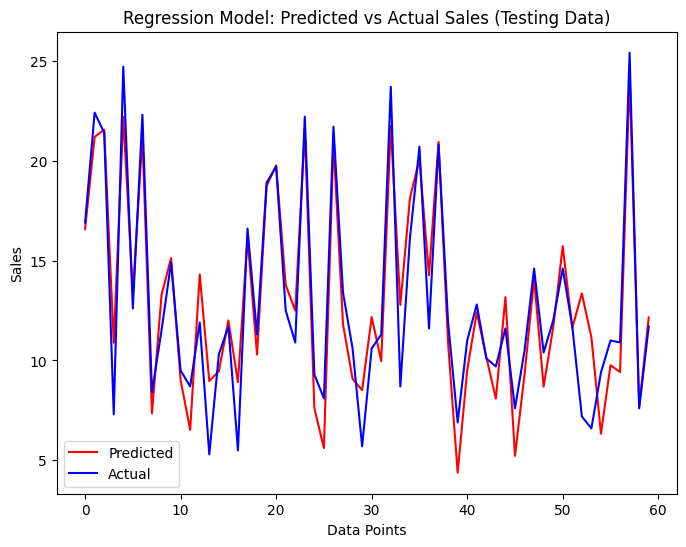

R-squared: 0.8609466508230368


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Advertising.csv')

# Display the first few rows of the dataset to understand its structure
# print(data.head())

# Prepare the feature and target variables
X = data.drop(columns=data.columns.difference(['TV', 'radio', 'newspaper']), axis=1)  # Features: TV, Radio, Newspaper advertising budgets
y = data['sales']  # Target variable: Sales
# print(y)
# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Plotting the regression line for predicted vs actual sales values for testing data
plt.figure(figsize=(8, 6))

# Plotting the predicted values
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Plotting the actual values
plt.plot(range(len(y_pred)), y_test.values, color='blue', label='Actual')

plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Regression Model: Predicted vs Actual Sales (Testing Data)')
plt.legend()
plt.show()

# Calculate model performance (e.g., using metrics like R-squared)
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

